<a href="https://colab.research.google.com/github/suminpixel/computer-vision-class/blob/main/OCR_Optical_character_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir images
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vHXk7Eg_PA8FgpFSyf8ZQkqgjoAVe7ng' -O images/1.jpg
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WHq4B_GmVKxGI6K7jxS9vK8GeOangpbr' -O images/2.jpg
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FWdNHvkkgxxf8h-Rp2CJKQ9rY8XVGhdy' -O images/3.jpg
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_JmOlY4E4FCNlydDkISbkquLKc3Nc-lT' -O images/4.jpg



--2021-05-30 07:03:15--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-05-30 07:03:15--  https://docs.google.com/uc?export=download&id=1vHXk7Eg_PA8FgpFSyf8ZQkqgjoAVe7ng
Resolving docs.google.com (docs.google.com)... 74.125.134.138, 74.125.134.113, 74.125.134.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qgdbc7dc8vsvlra4g9160r27pc78bkod/1622358150000/02396526014819477879/*/1vHXk7Eg_PA8FgpFSyf8ZQkqgjoAVe7ng?e=download [following]
--2021-05-30 07:03:16--  https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qgdbc7dc8vsvlra4g9160r27pc78bkod/1622358150000/02396526014819477879/*/1vHXk7Eg_PA8FgpFSyf8ZQkqgjoAVe7ng?e=download
Resolving doc-00-1s-docs.googleusercontent.com (d

<Figure size 864x720 with 0 Axes>

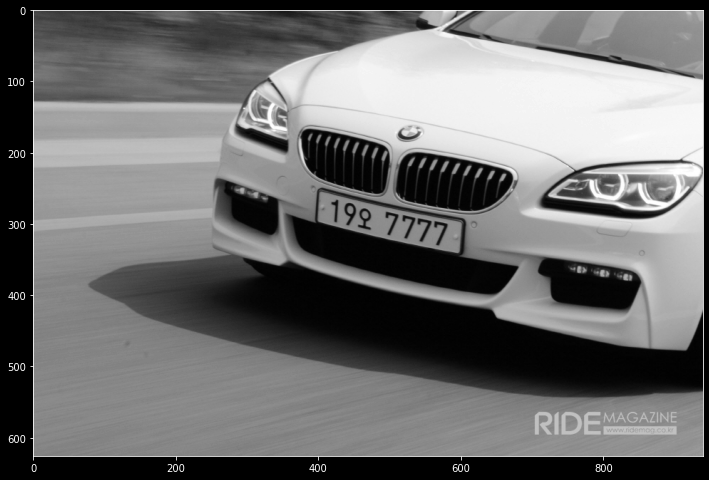

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
img_ori = cv2.imread('images/1.jpg')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
#plt.imshow(img_ori, cmap='gray')

gray = cv2.cvtColor(img_ori, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')




In [43]:
# Non blurred
img_thresh = cv2.adaptiveThreshold(
    gray,
    maxValue= 255.0,
    adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType = cv2.THRESH_BINARY_INV,
    blockSize = 19,
    C = 9
)


In [38]:
# Blurred
img_blurred = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=0)
img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue= 255.0,
    adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType = cv2.THRESH_BINARY_INV,
    blockSize = 19,
    C = 9
)


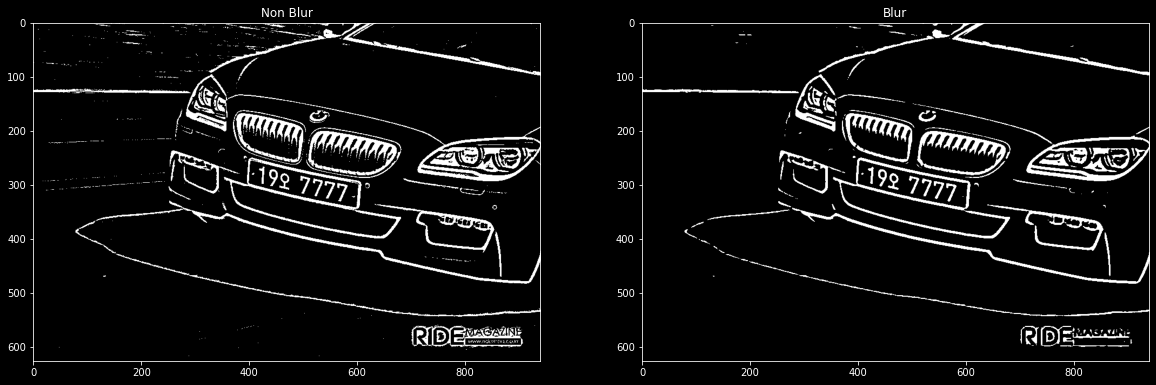

In [39]:
#이진화 작업 테스트 
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Non Blur')
plt.imshow(img_thresh, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blur')
plt.imshow(img_blur_thresh, cmap='gray')

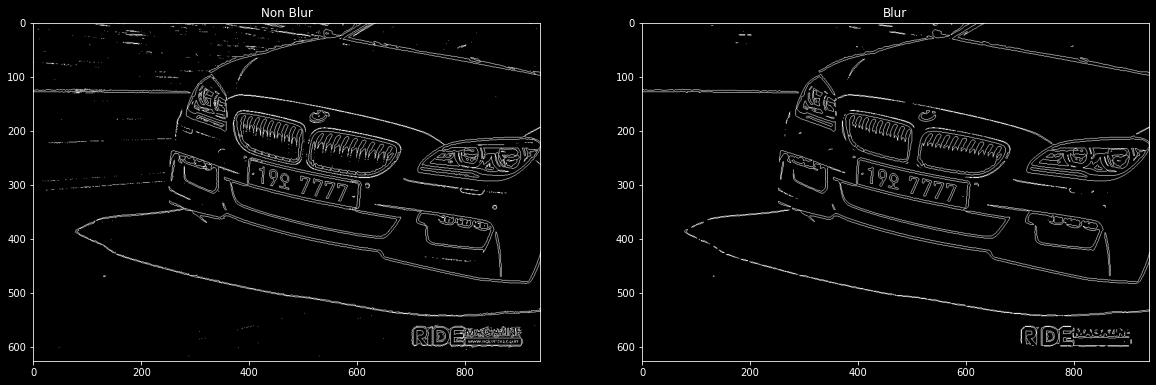

In [50]:
# findContours 윤곽선 추출

# Non Blurred
contours_non_blur, _ = cv2.findContours(
    img_thresh,
    mode = cv2.RETR_LIST,
    method = cv2.CHAIN_APPROX_SIMPLE 
)

temp_result_non_blur = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result_non_blur, contours=contours_non_blur, contourIdx = -1, color=(255, 255, 255))

# Blurred
contours, _ = cv2.findContours(
    img_blur_thresh,
    mode = cv2.RETR_LIST,
    method = cv2.CHAIN_APPROX_SIMPLE 
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx = -1, color=(255, 255, 255))

# image test
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Non Blur')
plt.imshow(temp_result_non_blur, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blur')
plt.imshow(temp_result, cmap='gray')



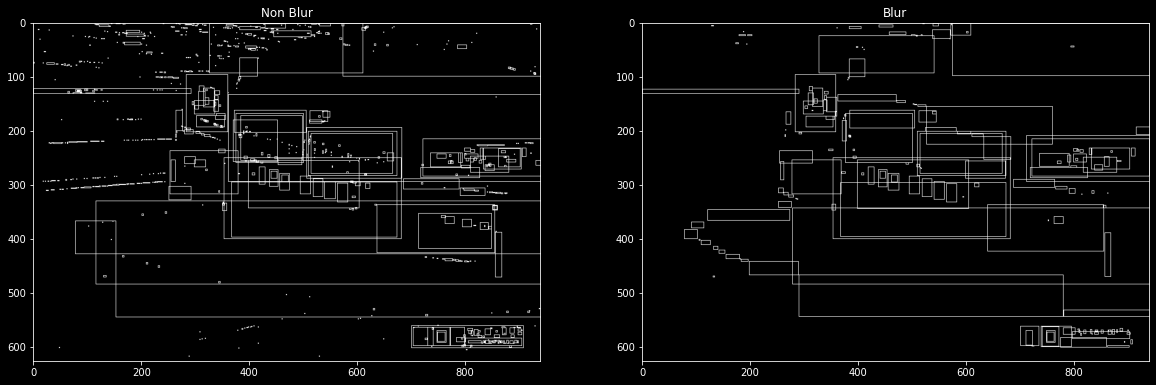

In [52]:
#Non-Blur
temp_result_non_blur = np.zeros((height, width, channel), dtype=np.uint8)
contours_dict_non_blur = []
for contour in contours_non_blur:
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(temp_result_non_blur, pt1 = (x, y), pt2 = (x+w, y+h), color=(255, 255, 255))
  contours_dict_non_blur.append({
      'contour': contour,
      'x': x,
      'y': y,
      'w': w,
      'h': h,
      'cx': x + (w/2),
      'cy': y + (h/2)
  })


#Blur
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 윤곽선을 사각형 객체로 인식
contours_dict = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  cv2.rectangle(temp_result, pt1 = (x, y), pt2 = (x+w, y+h), color=(255, 255, 255))
  contours_dict.append({
      'contour': contour,
      'x': x,
      'y': y,
      'w': w,
      'h': h,
      'cx': x + (w/2),
      'cy': y + (h/2)
  })

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Non Blur')
plt.imshow(temp_result_non_blur, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Blur')
plt.imshow(temp_result, cmap='gray')



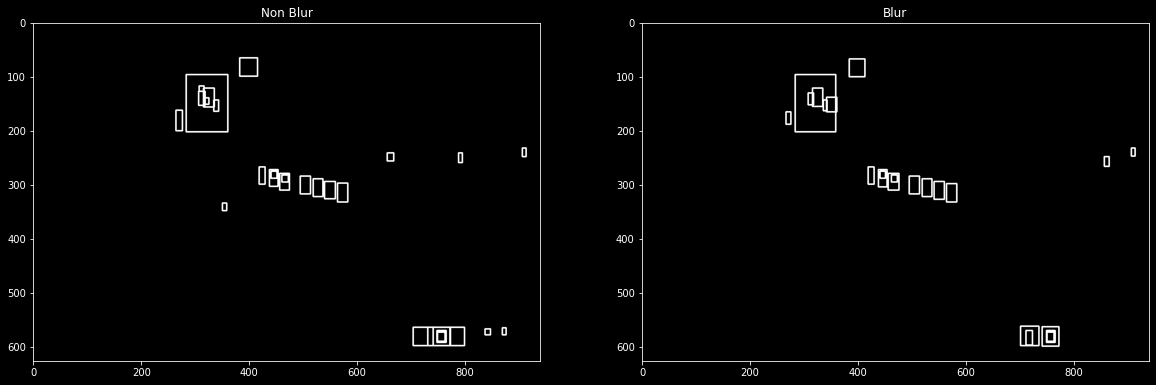

In [53]:
# 번호판을 뜻하는 사각형을 찾는것이 관건 

MIN_AREA = 80 # 개체의 너비가 80 이하인 조건 등 ... 실무에서는 이조차 알고리즘으로 만들어줘야함 
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0


#Non-blur

possible_contours_non_blur = []

cnt = 0

for d in contours_dict_non_blur:
  area = d['w'] * d['h']
  ratio = d['w'] / d['h']

  if area > MIN_AREA and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT and MIN_RATIO < ratio < MAX_RATIO:
    d['idx'] = cnt
    cnt += 1
    possible_contours_non_blur.append(d)



temp_result_non_blur = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours_non_blur:
  cv2.rectangle(temp_result_non_blur, pt1 = (d['x'], d['y']), 
                pt2=(d['x'] + d['w'] , d['y'] + d['h']), 
                color = (255,255,255), 
                thickness=2)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('Non Blur')
plt.imshow(temp_result_non_blur, cmap='gray')


#Blur
possible_contours = []

cnt = 0

for d in contours_dict:
  area = d['w'] * d['h']
  ratio = d['w'] / d['h']

  if area > MIN_AREA and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT and MIN_RATIO < ratio < MAX_RATIO:
    d['idx'] = cnt
    cnt += 1
    possible_contours.append(d)


temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
  cv2.rectangle(temp_result, pt1 = (d['x'], d['y']), 
                pt2=(d['x'] + d['w'] , d['y'] + d['h']), 
                color = (255,255,255), 
                thickness=2)
  

plt.subplot(1, 2, 2)
plt.title('Blur')
plt.imshow(temp_result, cmap='gray')



In [42]:
MAX_DIAG_MULTIPLAYER = 5
MAX_ANGLE_DIFF = 12.0
MAX_AREA_DIFF = 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3

def find_chars(contour_list):
  matched_result_idx = []
  
  for d1 in contour_list :
    matched_contours_idx = []
    for d2 in contour_list:
      if d1['idx'] == d2['idx']:
        continue

      dx = abs(d1['cx'] - d2['cx'])
      dy = abs(d1['cy'] - d2['cy'])

      diagonal_length1 = np.sprt(d1['w'] ** 2 + d1['h'] ** 2)

      distance = np.linalg.norm(np.array([d1['cx'], d1['cy']] - 
                                         np.array(d2['cx'] - d1['w'])))
      if dx == 0:
        angle_diff = 30
      else:
        angle_diff = np.degrees(np.arctan(dy/dx))
        area_diff = abs((d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h']))
        width_diff = abs(d1['w'] - d2['w'] / d1['w'])
        height_diff = abs(d1['h'] - d2['h'] / d1['h'])
      